# Exercise 1 - Python: Linear Regression

## **Part One:** Univariate linear regression

Predicting restaurant profits with city population

Beginning with package imports, data loading, and initial visualization

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression  # For comparing answers
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

In [2]:
dfRest = pd.read_csv('ex1/ex1data1.txt', header=None, names=['Population','Profit'])

dfRest.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


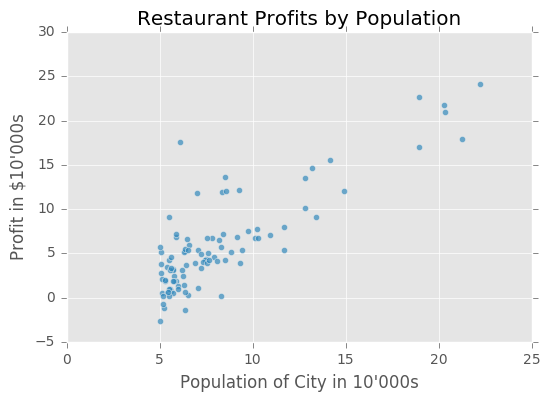

In [3]:
dfRest.plot.scatter(x='Population', y='Profit', alpha=0.7,
                    title='Restaurant Profits by Population')

plt.xlabel("Population of City in 10'000s")
plt.ylabel("Profit in $10'000s")

### Cost Function

**Hypothesis**: $h_\theta(x) = \theta_0 + \theta_1x_1$

- Notation:

    - $\theta_0$: Intercept

    - $\theta_1$: Coefficient of the regressor.  Statisticians will often write this as $\beta_1$

**Cost Function**: $J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2$

- Notation:

    - $m$: Number of records

    - $i$: Index of the record (e.x. if $i = 46$, then 46th row)

In [4]:
# Adding a column of 1s to better handle theta_0
dfRest['x0'] = 1

# Creating arrays out of the predictors and response variables
X = dfRest[['x0', 'Population']]
y = dfRest['Profit']

def cost_function(X, y, theta=[[0],[0]]):
    """Calculates the squared error"""
    m = y.size
    h = X.dot(theta)  # Dot product multiplication
    squaredError = np.sum((h.subtract(y, axis=0))**2)[0]
    return (1/(2*m))*squaredError

cost_function(X, y)

32.072733877455654

Showing the cost function of a few values of $\theta_1$ in a plot

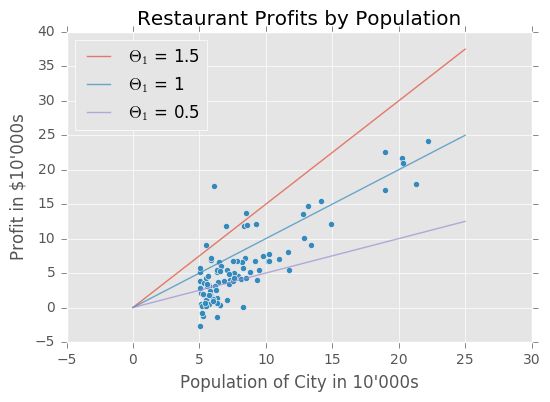

Theta_1 1.5: 25.6588949339
Theta_1 1: 7.44585554293
Theta_1 0.5: 9.58380185744


In [5]:
ax = dfRest.plot.scatter(x='Population', y='Profit',
                         title='Restaurant Profits by Population')

plt.xlabel("Population of City in 10'000s")
plt.ylabel("Profit in $10'000s")

plt.plot([x*1.5 for x in np.linspace(start=0, stop=25, num=26)],
         label='$\Theta_1$ = 1.5', alpha=0.7)
plt.plot([x for x in np.linspace(start=0, stop=25, num=26)],
         label='$\Theta_1$ = 1', alpha=0.7)
plt.plot([x*0.5 for x in np.linspace(start=0, stop=25, num=26)],
         label='$\Theta_1$ = 0.5', alpha=0.7)

ax.legend(loc=2)

plt.show()

print('Theta_1 1.5:', cost_function(X, y, theta=[[0],[1.5]]))
print('Theta_1 1:', cost_function(X, y, theta=[[0],[1]]))
print('Theta_1 0.5:', cost_function(X, y, theta=[[0],[0.5]]))

### Gradient Descent

Repeat until convergence:

$\theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})$

$\theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) \cdot x^{(i)}$

- Notation:

    - $\theta_0$: Intercept

    - $\theta_1$: Coefficient of the regressor.  Statisticians will write this as $\beta_1$

    - $m$: Number of records

    - $i$: Index of the record (e.x. if $i = 46$, then 46th row)
    
    - $\alpha$: Learning rate (e.g. size of step for gradient descent to take at each iteration)
    
Alternatively, assume the $x_0 = 1$, to use the more convenient expression:

$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)}) \cdot x_j^{(i)}$

In [6]:
def gradient_descent(X, y, alpha, iterations):
    """
    Batch gradient descent
    Calculates and stores the cost at each iteration for plotting
    """
    costIteration = []  # For storing the cost function at each iteration
    theta = [[0] for x in np.zeros(X.shape[1])]  # Initializing thetas with 0s
    m = y.size
    
    for i in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(np.dot(X.values.T, (h.subtract(y, axis=0))))
        costIteration.append(cost_function(X, y, theta))
    return (theta, costIteration)

# Setting parameters per exercise instructions
alpha = 0.01
iterations = 1500

# Running on the data and showing the values of theta
pt1GradientDescent = gradient_descent(X, y, alpha=alpha, iterations=iterations)
pt1Theta = pt1GradientDescent[0].ravel()
print('Theta 0:', pt1Theta[0])
print('Theta 1:', pt1Theta[1])

Theta 0: -3.6302914394
Theta 1: 1.16636235034


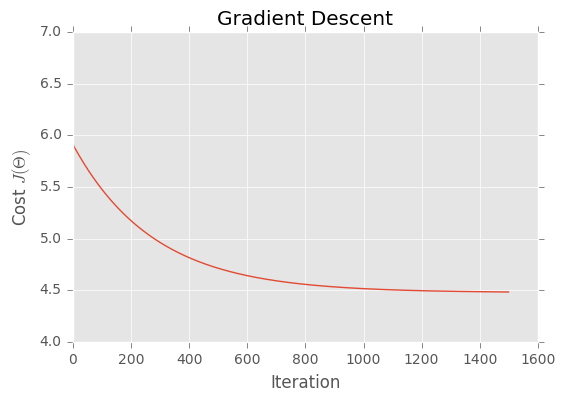

In [7]:
plt.plot(pt1GradientDescent[1])
plt.title('Gradient Descent')
plt.ylabel('Cost $J(\Theta)$')
plt.xlabel('Iteration')

Displaying predictions on top of the data

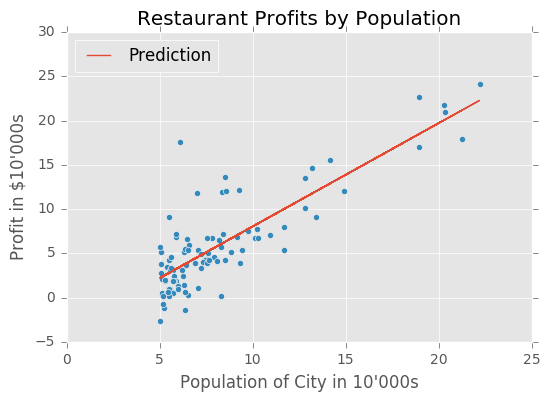

In [8]:
# Generating the predictions using our acquired values of theta
dfRest['Prediction'] = pt1Theta[0] + dfRest['Population']*pt1Theta[1]

ax = dfRest.plot.scatter(x='Population', y='Profit',
                         title='Restaurant Profits by Population')

plt.xlabel("Population of City in 10'000s")
plt.ylabel("Profit in $10'000s")

ax.plot(dfRest['Population'], dfRest['Prediction'], label='Prediction')

ax.legend(loc=2)

### Normal Equation

The normal equation is another way to find the optimal values for $\theta$.  Unlike gradient descent, it does not take multiple iterations, but it does not handle large data sets due to being $O(n^3)$.

The equation is $\theta = (X^T X)^{-1}X^Ty$

- Notation:

    - $\theta$: Coefficient of the regressor
    
    - $X$: Regressors in a long format
    
        - E.x. $x^{(i)} = \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)} \end{bmatrix}$
        
            - $i$: Index of the record (e.x. if $i = 46$, then 46th row)
            
            - $n$: Number of features
            
    - $X^T$: Transposed regressors (in a wide format)
    
        - E.x. $x^{(i)} = \begin{bmatrix} x_1^{(i)}, x_2^{(i)}, \dots, x_n^{(i)} \end{bmatrix}$
        
            - $i$: Index of the record (e.x. if $i = 46$, then 46th row)
            
            - $n$: Number of features
            
    - $y$: Target variable
    
        - E.x. $y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{bmatrix}$
        
            - $m$: Number of records

In [9]:
def normal_equation(X, y):
    """Returns the optimal values of theta"""
    if type(X) is not np.ndarray:
        X = np.array(X)
    if type(y) is not np.ndarray:
        y = np.array(y)
        
    inverseX = np.linalg.inv(X.T.dot(X))
    return (inverseX.dot(X.T)).dot(y)

pt1normalEquation = normal_equation(X, y)
pt1normalEquation

array([-3.89578088,  1.19303364])

Gathering the parameters from using scikit-learn for comparison

In [10]:
model = LinearRegression()
model.fit(X, y)

for theta in enumerate(model.coef_):
    if theta[0] == 0:  # Appears as 0
        print('Theta 0', model.intercept_)
    else:
        print('Theta', theta[0], ':', theta[1])

Theta 0 -3.89578087831
Theta 1 : 1.19303364419


Comparing the parameters of all three methods

In [11]:
pd.DataFrame([pt1normalEquation, pt1Theta, [model.intercept_, model.coef_[1]]],
             columns=['Theta0', 'Theta1'],
             index=['NormalEquation', 'GradientDescent', 'skLearn'])

,Theta0,Theta1
NormalEquation,-3.895781,1.193034
GradientDescent,-3.630291,1.166362
skLearn,-3.895781,1.193034


---

##  **Part 2:** Multivariate linear regression

Predicting housing prices with multiple variables

In [12]:
dfHouse = pd.read_csv('ex1/ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])

dfHouse.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


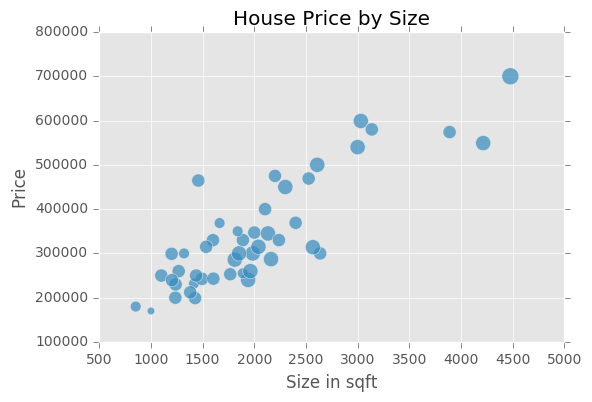

In [13]:
dfHouse.plot.scatter(x='Size', y='Price',
                     alpha=0.7, s=dfHouse['Bedrooms']*30,  # Multiplying to scale up point size
                     title='House Price by Size')

plt.xlabel("Size in sqft")

#### Feature normalization

Normalizing the features with standardization due to house size being significantly larger than the number of bedrooms.  This will play nicer with our gradient descent function.

Standardization: $x' = \frac{x - \bar{x}}{\sigma}$

In [14]:
def standard_scaler(x):
    xScaled = (x - x.mean()) / x.std()
    return xScaled

dfHouse_scaled = dfHouse.apply(standard_scaler)

In [15]:
# Adding a column of 1s to better handle theta_0
dfHouse_scaled['x0'] = 1

# Creating arrays out of the predictors and response variables
X = dfHouse_scaled[['x0', 'Size', 'Bedrooms']]
y = dfHouse_scaled['Price']

X.head()

,x0,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [16]:
cost_function(X,y,[[0],[0],[0]])

0.4893617021276595

In [17]:
pt2GradientDescent = gradient_descent(X, y, alpha=alpha, iterations=iterations)
pt2Theta = pt2GradientDescent[0].ravel()
print('Theta 0:', pt2Theta[0])
print('Theta 1:', pt2Theta[1])
print('Theta 2:', pt2Theta[2])

Theta 0: -9.9270473638e-17
Theta 1: 0.884042348978
Theta 2: -0.0524551808647


Comparing the parameters of all three methods

In [18]:
pt2normalEquation = normal_equation(X, y)

model = LinearRegression()
model.fit(X, y)

pd.DataFrame([pt2normalEquation, pt2Theta, [model.intercept_, model.coef_[1], model.coef_[2]]],
             columns=['Theta0', 'Theta1', 'Theta2'],
             index=['NormalEquation', 'GradientDescent', 'skLearn'])

,Theta0,Theta1,Theta2
NormalEquation,-1.040834e-16,0.884766,-0.053179
GradientDescent,-9.927047e-17,0.884042,-0.052455
skLearn,-9.268523e-17,0.884766,-0.053179


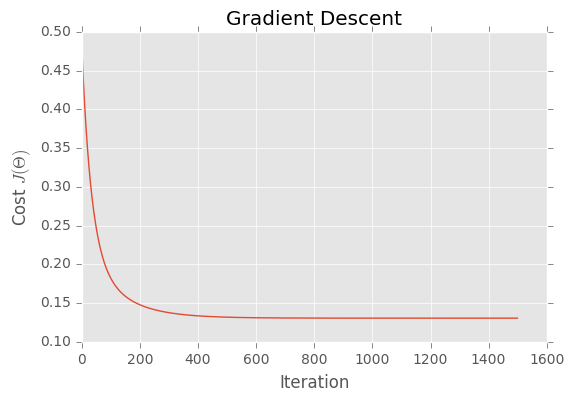

In [19]:
plt.plot(pt2GradientDescent[1])
plt.title('Gradient Descent')
plt.ylabel('Cost $J(\Theta)$')
plt.xlabel('Iteration')

Displaying predictions on top of the data

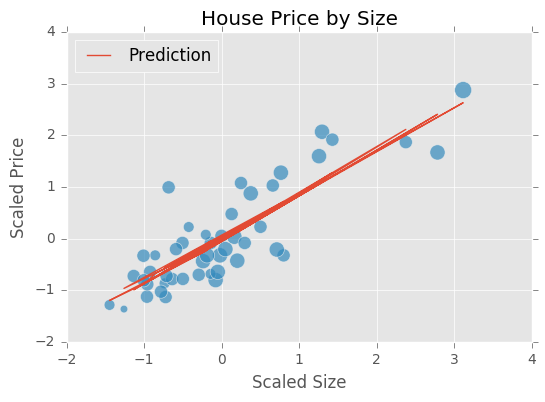

In [20]:
# Generating the predictions using our acquired values of theta
dfHouse_scaled['Prediction'] = pt2Theta[0] + \
                               dfHouse_scaled['Size']*pt2Theta[1] + \
                               dfHouse_scaled['Bedrooms']*pt2Theta[2]

ax = dfHouse_scaled.plot.scatter(x='Size', y='Price',
                     alpha=0.7, s=dfHouse['Bedrooms']*30,  # Multiplying to scale up point size
                     title='House Price by Size')

plt.xlabel("Scaled Size")
plt.ylabel("Scaled Price")

ax.plot(dfHouse_scaled['Size'], dfHouse_scaled['Prediction'], label='Prediction')

ax.legend(loc=2)

Choosing $\alpha$

In [21]:
%%time

pt2GradientDescent001 = gradient_descent(X, y, alpha=0.001, iterations=iterations)
pt2GradientDescent01 = gradient_descent(X, y, alpha=0.01, iterations=iterations)
pt2GradientDescent1 = gradient_descent(X, y, alpha=0.1, iterations=iterations)
pt2GradientDescent10 = gradient_descent(X, y, alpha=1.0, iterations=iterations)

Wall time: 15.8 s


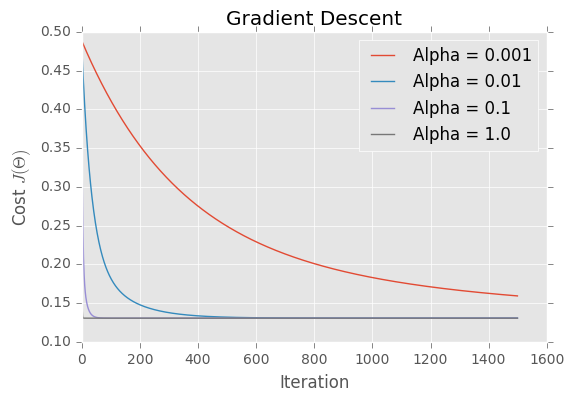

In [22]:
plt.plot(pt2GradientDescent001[1], label="Alpha = 0.001")
plt.plot(pt2GradientDescent01[1], label="Alpha = 0.01")
plt.plot(pt2GradientDescent1[1], label="Alpha = 0.1")
plt.plot(pt2GradientDescent10[1], label="Alpha = 1.0")
plt.legend()
plt.title('Gradient Descent')
plt.ylabel('Cost $J(\Theta)$')
plt.xlabel('Iteration')